In [21]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.tree import DecisionTreeClassifier

In [58]:
from matplotlib import pyplot

In [22]:
final_train = pd.read_csv("train_processed.csv")
final_train.head(5)

,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_log_historical_price,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,label
0,1,12,187,219,44147,3,3.5,1,2.20,4.81,129.35,0,23246,1,0,4,0,1,1,0
1,1,12,187,219,68914,2,3.0,1,2.20,4.44,100.89,0,23246,1,0,4,0,1,1,5
2,4,5,219,219,109185,4,4.5,1,3.18,6.08,323.00,1,12588,2,46,1,0,1,1,0
3,4,5,219,219,139893,2,3.0,1,1.61,5.25,129.00,0,12588,2,46,1,0,1,1,1
4,6,14,100,100,104251,3,4.0,1,1.95,0.00,145.00,0,21106,1,5,2,0,1,0,5


In [23]:
X = final_train.drop("label", axis=1)
y = final_train['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [24]:
final_train.replace([np.inf, -np.inf], np.nan, inplace=True)
final_train.fillna(0, inplace=True)

In [25]:
final_train.iloc[214695]

srch_id                        161400.00
site_id                             5.00
visitor_location_country_id       219.00
prop_country_id                   219.00
prop_id                         15121.00
prop_starrating                     3.00
prop_review_score                   4.00
prop_brand_bool                     1.00
prop_location_score1                1.61
prop_log_historical_price           0.00
price_usd                          74.00
promotion_flag                      0.00
srch_destination_id             20995.00
srch_length_of_stay                 3.00
srch_booking_window                 0.00
srch_adults_count                   2.00
srch_children_count                 0.00
srch_room_count                     1.00
srch_saturday_night_bool            0.00
label                               0.00
Name: 214695, dtype: float64

In [26]:
!pip install pyyaml h5py

In [29]:
DTree_cllf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=14,
 max_features='sqrt', max_leaf_nodes=10,
 min_impurity_split=1e-07, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.0,
 presort=False, random_state=1, splitter='best')
scores_accuracy = cross_val_score(DTree_clf, X, y, cv=10, scoring='accuracy')

In [30]:
print('K-fold cross-validation results:')
print(DTree_cllf.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())

K-fold cross-validation results:
DecisionTreeClassifier average accuracy is 0.411


In [32]:
final_test = pd.read_csv("test_processed.csv", sep = ',')

In [33]:
final_test.replace([np.inf, -np.inf], np.nan, inplace=True)
final_test.fillna(0, inplace=True)

In [34]:
final_test.head(20)

,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_log_historical_price,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool
0,1,24,216,219,3180,3,4.5,1,2.94,5.03,119.00,0,19222,1,10,2,0,1,0
1,1,24,216,219,5543,3,4.5,1,2.64,4.93,118.00,0,19222,1,10,2,0,1,0
2,1,24,216,219,14142,2,3.5,1,2.71,4.16,49.00,0,19222,1,10,2,0,1,0
3,1,24,216,219,22393,3,4.5,1,2.40,5.03,143.00,0,19222,1,10,2,0,1,0
4,1,24,216,219,24194,3,4.5,1,2.94,4.72,79.00,0,19222,1,10,2,0,1,0
5,1,24,216,219,28181,3,4.5,1,2.30,4.68,84.15,0,19222,1,10,2,0,1,0
6,1,24,216,219,34263,3,4.5,1,3.09,4.63,79.00,0,19222,1,10,2,0,1,0
7,1,24,216,219,37567,2,4.5,0,2.83,4.21,52.40,1,19222,1,10,2,0,1,0
8,1,24,216,219,50162,2,3.5,1,2.20,4.36,49.99,1,19222,1,10,2,0,1,0
9,1,24,216,219,54937,3,4.0,1,2.08,4.75,83.30,1,19222,1,10,2,0,1,0


In [36]:
DTree_cllf.fit(X, y)

C:\Users\joaqu\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
C:\Users\joaqu\anaconda3\lib\site-packages\sklearn\tree\_classes.py:323: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  warnings.warn("The parameter 'presort' is deprecated and has no "


DecisionTreeClassifier(max_depth=14, max_features='sqrt', max_leaf_nodes=10,
                       min_impurity_split=1e-07, presort=False, random_state=1)

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.06353
Feature: 6, Score: 0.11888
Feature: 7, Score: 0.06018
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.16366
Feature: 11, Score: 0.32010
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.10134
Feature: 14, Score: 0.17231
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000


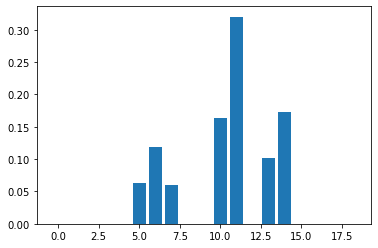

In [59]:
importance = DTree_cllf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [37]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443246 entries, 0 to 443245
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   srch_id                      443246 non-null  int64  
 1   site_id                      443246 non-null  int64  
 2   visitor_location_country_id  443246 non-null  int64  
 3   prop_country_id              443246 non-null  int64  
 4   prop_id                      443246 non-null  int64  
 5   prop_starrating              443246 non-null  int64  
 6   prop_review_score            443246 non-null  float64
 7   prop_brand_bool              443246 non-null  int64  
 8   prop_location_score1         443246 non-null  float64
 9   prop_log_historical_price    443246 non-null  float64
 10  price_usd                    443246 non-null  float64
 11  promotion_flag               443246 non-null  int64  
 12  srch_destination_id          443246 non-null  int64  
 13 

In [38]:
final_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4959183 entries, 0 to 4959182
Data columns (total 19 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   srch_id                      int64  
 1   site_id                      int64  
 2   visitor_location_country_id  int64  
 3   prop_country_id              int64  
 4   prop_id                      int64  
 5   prop_starrating              int64  
 6   prop_review_score            float64
 7   prop_brand_bool              int64  
 8   prop_location_score1         float64
 9   prop_log_historical_price    float64
 10  price_usd                    float64
 11  promotion_flag               int64  
 12  srch_destination_id          int64  
 13  srch_length_of_stay          int64  
 14  srch_booking_window          int64  
 15  srch_adults_count            int64  
 16  srch_children_count          int64  
 17  srch_room_count              int64  
 18  srch_saturday_night_bool     int64  
dtype

In [39]:
selectedfeatures = ["srch_id", "site_id", "visitor_location_country_id", "prop_country_id", "prop_id", "prop_starrating", "prop_review_score", "prop_brand_bool", "prop_location_score1", "prop_log_historical_price", "price_usd", "promotion_flag", "srch_destination_id", "srch_length_of_stay", "srch_booking_window", "srch_adults_count", "srch_children_count", "srch_room_count", "srch_saturday_night_bool"]

In [47]:
final_test['label'] = DTree_cllf.predict(final_test[selectedfeatures])

In [48]:
final_test.sort_values(["srch_id","label"],ascending=[True,False], inplace=True)

In [51]:
final_test[final_test.srch_id == 28].head(5)

,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_log_historical_price,...,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,target,label
430,28,5,219,219,4106,3,3.5,0,1.95,4.02,...,0,3422,4,50,1,0,1,1,0,0
431,28,5,219,219,4435,0,2.5,0,1.61,4.52,...,0,3422,4,50,1,0,1,1,0,0
432,28,5,219,219,9696,4,4.0,0,2.30,4.05,...,0,3422,4,50,1,0,1,1,0,0
433,28,5,219,219,27788,4,4.0,0,2.20,3.82,...,1,3422,4,50,1,0,1,1,0,0
434,28,5,219,219,49601,2,3.5,0,1.61,4.32,...,0,3422,4,50,1,0,1,1,0,0


In [52]:
final_test.head(20)

,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_log_historical_price,...,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,target,label
8,1,24,216,219,50162,2,3.5,1,2.20,4.36,...,1,19222,1,10,2,0,1,0,5,5
9,1,24,216,219,54937,3,4.0,1,2.08,4.75,...,1,19222,1,10,2,0,1,0,5,5
12,1,24,216,219,61934,3,4.5,1,2.89,4.69,...,1,19222,1,10,2,0,1,0,5,5
23,1,24,216,219,99484,3,4.0,1,2.40,4.54,...,1,19222,1,10,2,0,1,0,5,5
0,1,24,216,219,3180,3,4.5,1,2.94,5.03,...,0,19222,1,10,2,0,1,0,0,0
1,1,24,216,219,5543,3,4.5,1,2.64,4.93,...,0,19222,1,10,2,0,1,0,0,0
2,1,24,216,219,14142,2,3.5,1,2.71,4.16,...,0,19222,1,10,2,0,1,0,0,0
3,1,24,216,219,22393,3,4.5,1,2.40,5.03,...,0,19222,1,10,2,0,1,0,0,0
4,1,24,216,219,24194,3,4.5,1,2.94,4.72,...,0,19222,1,10,2,0,1,0,0,0
5,1,24,216,219,28181,3,4.5,1,2.30,4.68,...,0,19222,1,10,2,0,1,0,0,0


In [53]:
submission = final_test[['srch_id','prop_id']]

In [54]:
submission.head(5)

,srch_id,prop_id
8,1,50162
9,1,54937
12,1,61934
23,1,99484
0,1,3180


In [56]:
submission.to_csv("C:/Users/joaqu/pythonProject/DMT2/submission_Dtree.csv",index=False)